<a href="https://colab.research.google.com/github/CamiloZuletaVaron/MINE-4206_202510_AML/blob/workshop1/Talleres/Taller%201/MINE_4206_202510_AML_Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://docs.google.com/uc?export=download&id=1NUy1Q-abpoV9XYK9qT9t8Mdhj3ZVlveO)


# **Taller 1**

- **Camilo Zuleta Varón**
- **Santiago Sinistierra:**

### **Problemática**:
El cambio climático, impulsado por la emisión de gases de efecto invernadero como el CO2, está provocando el calentamiento global y un aumento en los desastres ambientales. La contaminación del aire y la pérdida de biodiversidad son algunas de sus consecuencias, lo que hace necesario establecer políticas y planes de gestión de riesgos para mitigar sus efectos. Una de las estrategias clave es la movilidad sostenible, que busca reducir las emisiones de CO2 mediante alternativas como el uso de vehículos eléctricos y bicicletas. Estas medidas no solo contribuyen a disminuir la contaminación, sino que también mejoran la calidad del aire y la salud pública.

En este contexto, los sistemas de alquiler de bicicletas en ciudades han surgido como una solución efectiva para reducir la congestión vehicular y fomentar el transporte ecológico. Sin embargo, uno de sus principales retos es la distribución desequilibrada de bicicletas en las estaciones, lo que afecta su disponibilidad y la satisfacción de los usuarios. Para optimizar su funcionamiento, se requieren soluciones basadas en datos que permitan predecir la demanda en tiempo real, considerando factores como el clima, la hora del día, la ubicación, etc. Esto facilitaría una mejor gestión del sistema, asegurando que las bicicletas estén disponibles en los momentos y lugares adecuados.

### **Objetivos:**

- Aplicar técnicas de regresión para construir un modelo predictivo que permita estimar la demanda sobre el uso de un sistema de alquiler de bicicletas siguiendo el ciclo de machine learning.
- Determinar cuáles son los factores que más inciden en la demanda con base en los datos.


> Nota: Los datos y el diccionario de datos lo pueden encontrar en el [repositorio de github](https://github.com/fcastellanosp/MINE-4206_202510_AML/tree/main/Talleres/Taller%201). No olvidar que la semilla es '77'.

&nbsp;

### **Actividades a realizar:**
1. Exploración y perfilamiento de los datos, utilizando las funcionalidades de la librería pandas. Recuerda que este paso es muy importante para determinar problemas de calidad y tomar decisiones relacionadas con la preparación de los datos para el algoritmo de aprendizaje.

2.	Limpieza y preparación de los datos, justificando las decisiones tomadas con base en los resultados obtenidos en el paso anterior.

3.	Construcción de un modelo de regresión polinomial. Para determinar el grado de la transformación polinomial emplea las técnicas de selección de modelos sobre los siguientes valores de grado de polinomio: `[2, 3]`. Utiliza para la selección la métrica RMSE.

4.	Construcción de un modelo de regresión regularizada Lasso. Para determinar el valor del hiperparámetro de regularización utiliza las técnicas de selección de modelos sobre los siguientes valores para `α: [1, 2, 3, 4, 5]`. Utiliza para la selección la métrica RMSE.

5.	Elaboración de una tabla comparativa mostrando el rendimiento sobre test de los dos modelos seleccionados (con mejores rendimientos) de las actividades 3 y 4, con las métricas R2, RMSE y MAE.

6.	Con base en el modelo Lasso determinar las variables más importantes para la predicción.

### **Análisis de resultados:**
Una vez construido los modelos, deberías estar en capacidad de responder estas preguntas:

- ¿Cuál es el grado de la transformación polinomial que fue seleccionado utilizando la técnica de validación?

- ¿Cuál fue el valor de α que fue seleccionado utilizando la técnica de validación para la regresión Lasso?

- A partir de la tabla comparativa, ¿cuál modelo ofrece el mejor rendimiento sobre el conjunto test? ¿Qué interpretación puedes darles a los valores obtenidos sobre las métricas de rendimiento?

- ¿Cuáles variables fueron seleccionadas con el modelo Lasso? A partir de estas, ¿qué interpretación de cara al problema puedes dar? Reflexiona sobre cómo este nuevo conocimiento podría ayudar a tomar decisiones en el contexto del problema.



> **NOTAS IMPORTANTES:**
> - El archivo se debe subir a BloqueNeon en el apartado de 'Actividades' y debe ser en formato .ipynb, ejecutado. **Celda que no esté ejecutada no será evaluada.**
> - El Notebook debe estar documentado con las justificaciones de las decisiones tomadas en cada paso del ciclo de ML.
> - El nombre del archivo debe ser `taller_1_{Apellido_Nombre}_{Apellido_Nombre}` de cada integrante.

In [1]:
!pip install ydata-profiling plotly kaggle -q # -q quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 22.7 MB/s eta 0:00:00


In [2]:
# Importacion de librerias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analisis profundo de datos
from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector

In [3]:
# Loading the data
data = pd.read_csv('https://raw.githubusercontent.com/fcastellanosp/MINE-4206_202510_AML/main/Talleres/Taller%201/Datos_Bicicletas.csv', sep=';')

In [ ]:
# Verificando si la data fue correctamente cargada
data.head()

season  weekday weathersit  temp   atemp   hum  windspeed  cnt time_of_day
0  Winter        6      Clear  3.28  3.0014  0.81        0.0   16       Night
1  Winter        6      Clear  2.34  1.9982  0.80        0.0   40       Night
2  Winter        6      Clear  2.34  1.9982  0.80        0.0   32       Night
3  Winter        6      Clear  3.28  3.0014  0.75        0.0   13       Night
4  Winter        6      Clear  3.28  3.0014  0.75        0.0    1       Night

In [4]:
# Separando los datos de prueba y entrenamiento
train, test = train_test_split(data, test_size=0.2, random_state=77)

x_test, y_test = test.drop('cnt', axis=1), test['cnt']
train.head()

season  weekday  weathersit   temp    atemp   hum  windspeed  cnt  \
326    Winter        6        Mist  -0.48  -2.9980  0.59     6.0032   12   
694    Winter        2  Light Rain  -0.48  -0.9982  0.93     0.0000   52   
16787    Fall        5        Mist   5.16   1.9982  0.75    11.0014   84   
13096  Summer        3       Clear  31.48  36.9980  0.53     8.9981  584   
17193  Winter        1       Clear   0.46  -2.9980  0.80     8.9981    9   

      time_of_day  
326         Night  
694       Morning  
16787     Morning  
13096       Night  
17193     Morning

## **Análisis exploratorio de los datos**

In [5]:
train.columns

Index(['season', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'time_of_day'],
      dtype='object')

In [ ]:
train.describe()

weekday          temp         atemp           hum     windspeed  \
count  13903.000000  13903.000000  13903.000000  13903.000000  13903.000000   
mean       3.010933     15.344629     15.386425      0.626738     12.758343   
std        2.006685      9.041724     11.319977      0.192786      8.216776   
min        0.000000     -7.060000    -16.000000      0.000000      0.000000   
25%        1.000000      7.980000      5.997800      0.480000      7.001500   
50%        3.000000     15.500000     15.996800      0.630000     12.998000   
75%        5.000000     23.020000     24.999200      0.780000     16.997900   
max        6.000000     39.000000     50.000000      1.000000     56.996900   

                cnt  
count  13903.000000  
mean     190.297777  
std      181.715159  
min        1.000000  
25%       41.000000  
50%      143.000000  
75%      281.000000  
max      977.000000

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13903 entries, 326 to 15063
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       13903 non-null  object 
 1   weekday      13903 non-null  int64  
 2   weathersit   13903 non-null  object 
 3   temp         13903 non-null  float64
 4   atemp        13903 non-null  float64
 5   hum          13903 non-null  float64
 6   windspeed    13903 non-null  float64
 7   cnt          13903 non-null  int64  
 8   time_of_day  13903 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 1.1+ MB


In [ ]:
report = train.profile_report(html={'style':{'full_width':True}})
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Hallazgos
* Se encuentran 24 datos duplicados, debido a la cantidad de datos que se tienen que son 13903, la muestra de duplicados no es relevante con respecto a la muestra por tanto se van a eliminar estos registros.

* Por otro lado, se observa que hay varios valores en 0 para la variable numérica de WindSpeed revisando el diccionario de datos no se observa un rango de datos definido. Adicional, se hizo una investigación si la velocidad del viento puede ser considerada como 0 y efectivamente se considera calmado, por lo que es un valor aceptable y no se procede a hacer alguna tranformación o medida de limpieza en la variable.

* Se deben procesar las variables categoricas y utilizar un one hot encoder en el procesamiento de dichas variables.


# **Limpieza y depuración de los datos**

Se hace uso de los pipelines para facilitar la limpieza y el procesamiento en el entrenamiento de los dos modelos.

In [6]:
# Se guarda una copia del entrenamiento
base_train = train.copy()

# Preparación previa a dividir el dataset
train = train.drop_duplicates()

# Se preparan los datos de entrenamiento y la variable objetivo
x_train, y_train = train.drop('cnt', axis=1), train['cnt']

display(x_train.head())
display(y_train.head())


season  weekday  weathersit   temp    atemp   hum  windspeed  \
326    Winter        6        Mist  -0.48  -2.9980  0.59     6.0032   
694    Winter        2  Light Rain  -0.48  -0.9982  0.93     0.0000   
16787    Fall        5        Mist   5.16   1.9982  0.75    11.0014   
13096  Summer        3       Clear  31.48  36.9980  0.53     8.9981   
17193  Winter        1       Clear   0.46  -2.9980  0.80     8.9981   

      time_of_day  
326         Night  
694       Morning  
16787     Morning  
13096       Night  
17193     Morning

326       12
694       52
16787     84
13096    584
17193      9
Name: cnt, dtype: int64

In [7]:
x_train.info()
x_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 13878 entries, 326 to 15063
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       13878 non-null  object 
 1   weekday      13878 non-null  int64  
 2   weathersit   13878 non-null  object 
 3   temp         13878 non-null  float64
 4   atemp        13878 non-null  float64
 5   hum          13878 non-null  float64
 6   windspeed    13878 non-null  float64
 7   time_of_day  13878 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 975.8+ KB


season  weekday  weathersit   temp    atemp   hum  windspeed  \
326    Winter        6        Mist  -0.48  -2.9980  0.59     6.0032   
694    Winter        2  Light Rain  -0.48  -0.9982  0.93     0.0000   
16787    Fall        5        Mist   5.16   1.9982  0.75    11.0014   
13096  Summer        3       Clear  31.48  36.9980  0.53     8.9981   
17193  Winter        1       Clear   0.46  -2.9980  0.80     8.9981   

      time_of_day  
326         Night  
694       Morning  
16787     Morning  
13096       Night  
17193     Morning

In [8]:
# Preparación y limpieza de datos
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), make_column_selector(dtype_include=object)),
        ("num", StandardScaler(), make_column_selector(dtype_include=np.number)),
    ]
)

pipe = Pipeline(
    steps=[
        ("column_transformer", preprocessor)
    ]
)

pipe


Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x79b2f2f2e410>),
                                                 ('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x79b2f2eebbd0>)]))])

In [ ]:
pipe.fit_transform(x_train)

array([[ 0.        ,  0.        ,  0.        , ..., -1.62611797,
        -0.18976421, -0.82250064],
       [ 0.        ,  0.        ,  0.        , ..., -1.44939234,
         1.57447875, -1.55314184],
       [ 1.        ,  0.        ,  0.        , ..., -1.18459551,
         0.64046777, -0.21417661],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -1.53804678,
         0.89991527, -0.70099893],
       [ 0.        ,  0.        ,  0.        , ..., -0.91921543,
        -0.29354321,  0.27264571],
       [ 1.        ,  0.        ,  0.        , ...,  0.14113838,
        -0.55299071, -0.70099893]])

In [9]:
pipe_values = pd.DataFrame(pipe.fit_transform(x_train), columns=pipe.named_steps['column_transformer'].get_feature_names_out())
pipe_values.head()

cat__season_Fall  cat__season_Spring  cat__season_Summer  \
0               0.0                 0.0                 0.0   
1               0.0                 0.0                 0.0   
2               1.0                 0.0                 0.0   
3               0.0                 0.0                 1.0   
4               0.0                 0.0                 0.0   

   cat__season_Winter  cat__weathersit_Clear  cat__weathersit_Heavy Rain  \
0                 1.0                    0.0                         0.0   
1                 1.0                    0.0                         0.0   
2                 0.0                    0.0                         0.0   
3                 0.0                    1.0                         0.0   
4                 1.0                    1.0                         0.0   

   cat__weathersit_Light Rain  cat__weathersit_Mist  cat__time_of_day_Evening  \
0                         0.0                   1.0                       0.0   
1                         1.0                   0.0                       0.0   
2                         0.0                   1.0                       0.0   
3                         0.0                   0.0                       0.0   
4                         0.0                   0.0                       0.0   

   cat__time_of_day_Morning  cat__time_of_day_Night  num__weekday  num__temp  \
0                       0.0                     1.0      1.488812  -1.752284   
1                       1.0                     0.0     -0.504361  -1.752284   
2                       1.0                     0.0      0.990518  -1.128279   
3                       0.0                     1.0     -0.006068   1.783743   
4                       1.0                     0.0     -1.002654  -1.648283   

   num__atemp  num__hum  num__windspeed  
0   -1.626118 -0.189764       -0.822501  
1   -1.449392  1.574479       -1.553142  
2   -1.184596  0.640468       -0.214177  
3    1.908395 -0.501101       -0.457995  
4   -1.626118  0.899915       -0.457995

In [10]:
num_column_names = pipe['column_transformer'].transformers_[1][1].get_feature_names_out()
cat_column_names = pipe['column_transformer'].transformers_[0][1].feature_names_in_
col_names = list(num_column_names) + list(cat_column_names)


## Hallazgos
Después de realizar la limpieza y preparación de los datos no se encontraron novedades.

Los pasos realizados fueron los siguientes.

* Dividir los datos de entrenamiento y la variable objetivo.
* Categorizar la variable weekday.
* Realizar el pipeline de preparación de los datos standarizando los númericos y aplicando one hot encoder para los categóricos.
* Por último se hizo un pequeño análisis exploratorio para revisar que los datos que salen del pipeline estan de acuerdo a lo que se está buscando

# **Entranamiento del modelo**
## Regresión polinomial

Se procede a hacer el entrenamiento del modelo regresión polinomial con el grado de polinomio [2, 3] usando la métrica RMSE


In [11]:
best_estimator = [
        ('transform', pipe),
        ('polinomial', PolynomialFeatures()),
        ('regression', LinearRegression())
]

polinomial_pipe = Pipeline(best_estimator)

param_grid = {
              'polinomial__degree':[2,3]
              }

grid_search = GridSearchCV(polinomial_pipe, param_grid, verbose=2, scoring='neg_root_mean_squared_error', cv=5)

In [ ]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ...............................polinomial__degree=2; total time=   0.2s
[CV] END ...............................polinomial__degree=2; total time=   0.2s
[CV] END ...............................polinomial__degree=2; total time=   0.2s
[CV] END ...............................polinomial__degree=2; total time=   0.3s
[CV] END ...............................polinomial__degree=2; total time=   0.2s
[CV] END ...............................polinomial__degree=3; total time=   1.9s
[CV] END ...............................polinomial__degree=3; total time=   1.9s
[CV] END ...............................polinomial__degree=3; total time=   1.9s
[CV] END ...............................polinomial__degree=3; total time=   2.4s
[CV] END ...............................polinomial__degree=3; total time=   3.3s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        Pipeline(steps=[('column_transformer',
                                                         ColumnTransformer(transformers=[('cat',
                                                                                          OneHotEncoder(),
                                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x787fe5e73490>),
                                                                                         ('num',
                                                                                          StandardScaler(),
                                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x787fe5e72f10>)]))])),
                                       ('polinomial', PolynomialFeatures()),
                                       ('regression', LinearRegression())]),
             param_grid={'polinomial__degree': [2, 3]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
polinomial_best_model = grid_search.best_estimator_

polinomial_results = pd.DataFrame(grid_search.cv_results_)
polinomial_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.223602      0.035164         0.023406        0.002405   
1       2.233431      0.544274         0.036336        0.003467   

   param_polinomial__degree                     params  split0_test_score  \
0                         2  {'polinomial__degree': 2}        -133.948863   
1                         3  {'polinomial__degree': 3}        -130.260265   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0        -132.641148        -132.465770        -136.617666        -130.288106   
1        -134.645354        -129.452278        -133.170546        -127.141347   

   mean_test_score  std_test_score  rank_test_score  
0      -133.192311        2.077088                2  
1      -130.933958        2.676189                1

In [ ]:
# Evaluación del modelo
grid_search.best_params_

{'polinomial__degree': 3}

In [ ]:
y_pred_train = polinomial_best_model.predict(x_train)
y_pred_train

array([ 54.17419927,  63.68049604, 183.67101863, ...,  16.14307416,
       155.25521747, 214.81285802])

In [ ]:
# Hallando los coeficientes de las variables
coef_lr = dict(zip(col_names, polinomial_best_model["regression"].coef_))
for k,v in coef_lr.items():
    print(f'{k} = {v:,.2f}')

weekday = -0.00
temp = 3.36
atemp = -3.34
hum = 8.23
windspeed = -8.26
season = 8.93
weathersit = 0.07
time_of_day = -6.03


In [ ]:
n,p = x_train.shape

print('------------ Regresión Polinomial con entrenamiento------------')
print("RMSE: %.2f" % root_mean_squared_error(y_train, y_pred_train))
print("R2-score: %.5f" % r2_score(y_train, y_pred_train) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_train, y_pred_train))*(n-1)/(n-p-1)) )


------------ Regresión Polinomial con entrenamiento------------
RMSE: 126.85
R2-score: 0.51274
Adj R2-score: 0.51246


In [ ]:
x_test, y_test = test.drop('cnt', axis=1), test['cnt']

y_pred_test = polinomial_best_model.predict(x_test)
y_pred_test

array([261.81839739, 476.79527236, 157.52221675, ..., 177.2507597 ,
       297.9939491 , 136.12943553])

In [ ]:
n,p = x_test.shape

print('------------ Regresión Polinomial con evaluación ------------')
print("RMSE: %.2f" % root_mean_squared_error(y_test, y_pred_test))
print("R2-score: %.5f" % r2_score(y_test, y_pred_test) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_test, y_pred_test))*(n-1)/(n-p-1)) )

------------ Regresión Polinomial con evaluación ------------
RMSE: 129.27
R2-score: 0.48439
Adj R2-score: 0.48320


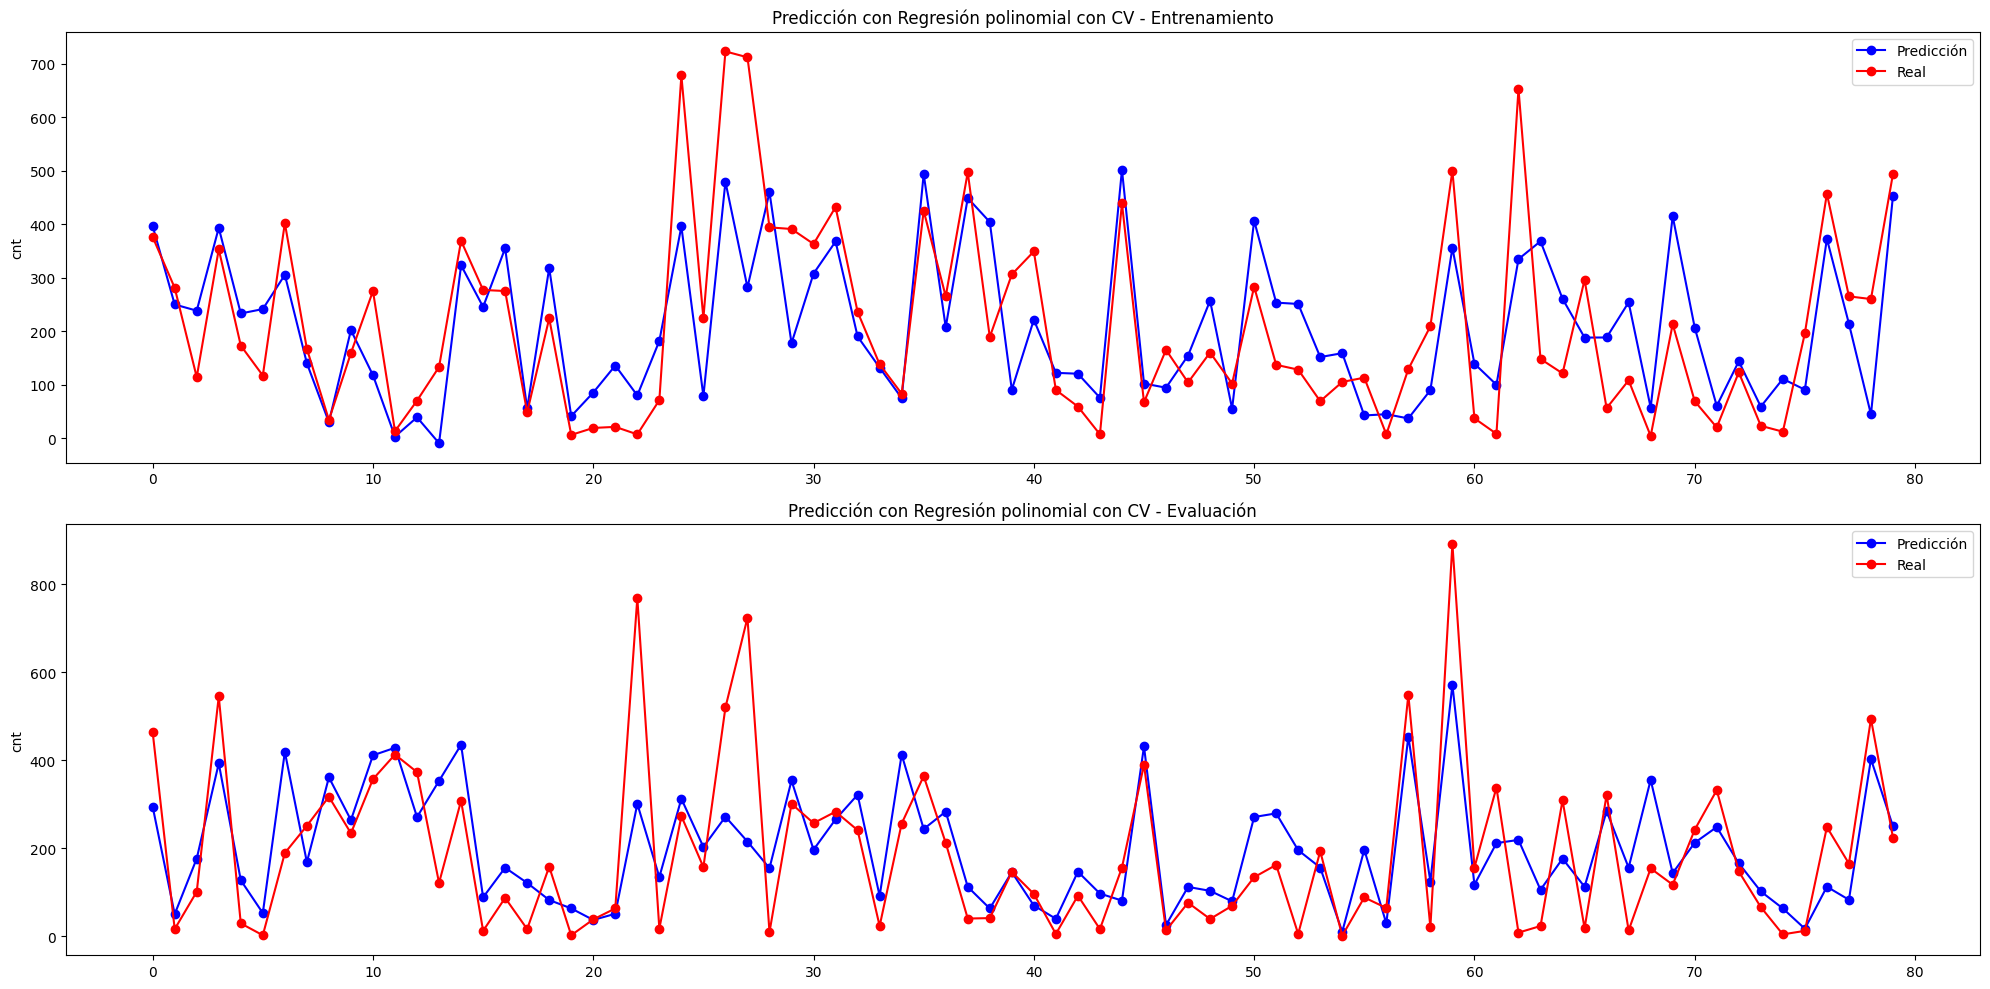

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(2,figsize=(20,10))
a = 1000
b= 1080

xvals = list(range(b-a))
axs[0].plot(xvals, y_pred_train[a:b],'bo-', label='Predicción')
axs[0].plot(xvals, y_train[a:b],'ro-', label='Real')

axs[1].plot(xvals, y_pred_test[a:b],'bo-', label='Predicción')
axs[1].plot(xvals, y_test[a:b],'ro-', label='Real')

axs[0].set(title='Predicción con Regresión polinomial con CV - Entrenamiento', ylabel=y_train.name)
axs[0].legend()

axs[1].set(title='Predicción con Regresión polinomial con CV - Evaluación', ylabel=y_train.name)
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
poly_model = polinomial_best_model['regression']
trans_df = polinomial_best_model['transform'].transform(x_test)
fake_df = polinomial_best_model['polinomial'].transform(trans_df)

print(f'Intercepto: {poly_model.intercept_}')
coef = list(zip(['Intercepto'] + list(col_names), [poly_model.intercept_] + list(poly_model.coef_)))
coef = pd.DataFrame(coef,columns=['Variable','Parámetro'])
coef

Intercepto: 215.18592910274768


Variable     Parámetro
0   Intercepto  2.151859e+02
1      weekday -1.498118e-12
2         temp  3.363057e+00
3        atemp -3.338589e+00
4          hum  8.232859e+00
5    windspeed -8.257327e+00
6       season  8.925039e+00
7   weathersit  7.074354e-02
8  time_of_day -6.030648e+00

# **Entrenamiento con el modelo lasso**

Búsqueda del mejor modelo utilizando Grid, regularizando el modelo.

In [12]:
estimators_best = [
        ('transform', preprocessor),
        ('polinomial',PolynomialFeatures()),
        ('regression', Lasso())
]

pipe_best = Pipeline(estimators_best)

# Parametros de la busqueda
parameters = {
              'polinomial__degree':[2,3],
              'regression__alpha': [1, 2, 3, 4, 5],
              }

grid_search = GridSearchCV(pipe_best, parameters, verbose=2, scoring='neg_mean_squared_error', cv=5)

In [13]:
%%time
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..........polinomial__degree=2, regression__alpha=1; total time=   1.8s
[CV] END ..........polinomial__degree=2, regression__alpha=1; total time=   0.8s
[CV] END ..........polinomial__degree=2, regression__alpha=1; total time=   0.4s
[CV] END ..........polinomial__degree=2, regression__alpha=1; total time=   0.4s
[CV] END ..........polinomial__degree=2, regression__alpha=1; total time=   0.4s
[CV] END ..........polinomial__degree=2, regression__alpha=2; total time=   0.4s
[CV] END ..........polinomial__degree=2, regression__alpha=2; total time=   0.4s
[CV] END ..........polinomial__degree=2, regression__alpha=2; total time=   0.4s
[CV] END ..........polinomial__degree=2, regression__alpha=2; total time=   0.4s
[CV] END ..........polinomial__degree=2, regression__alpha=2; total time=   0.4s
[CV] END ..........polinomial__degree=2, regression__alpha=3; total time=   0.3s
[CV] END ..........polinomial__degree=2, regress

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x79b2f2f2e410>),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x79b2f2eebbd0>)])),
                                       ('polinomial', PolynomialFeatures()),
                                       ('regression', Lasso())]),
             param_grid={'polinomial__degree': [2, 3],
                         'regression__alpha': [1, 2, 3, 4, 5]},
             scoring='neg_mean_squared_error', verbose=2)

In [14]:
best_model = grid_search.best_estimator_

pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.721679      0.511759         0.029992        0.017755   
1       0.362747      0.032147         0.017603        0.002596   
2       0.361800      0.034738         0.017467        0.002060   
3       0.355515      0.052214         0.019287        0.002457   
4       0.359376      0.056146         0.017362        0.002841   
5       9.760829      1.930764         0.047645        0.016903   
6       7.510692      1.658579         0.032195        0.001852   
7       5.152997      1.626069         0.040108        0.009633   
8       4.410012      1.308632         0.047611        0.019882   
9       2.945367      1.309067         0.029987        0.000261   

   param_polinomial__degree  param_regression__alpha  \
0                         2                        1   
1                         2                        2   
2                         2                        3   
3                         2                        4   
4                         2                        5   
5                         3                        1   
6                         3                        2   
7                         3                        3   
8                         3                        4   
9                         3                        5   

                                              params  split0_test_score  \
0  {'polinomial__degree': 2, 'regression__alpha': 1}      -17963.671446   
1  {'polinomial__degree': 2, 'regression__alpha': 2}      -18092.071803   
2  {'polinomial__degree': 2, 'regression__alpha': 3}      -18221.601512   
3  {'polinomial__degree': 2, 'regression__alpha': 4}      -18384.754128   
4  {'polinomial__degree': 2, 'regression__alpha': 5}      -18557.165580   
5  {'polinomial__degree': 3, 'regression__alpha': 1}      -17228.659186   
6  {'polinomial__degree': 3, 'regression__alpha': 2}      -17494.250760   
7  {'polinomial__degree': 3, 'regression__alpha': 3}      -17720.468367   
8  {'polinomial__degree': 3, 'regression__alpha': 4}      -17950.349285   
9  {'polinomial__degree': 3, 'regression__alpha': 5}      -18206.919817   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0      -17847.377848      -17729.087851      -18797.750003      -17225.673034   
1      -18068.356046      -17926.460998      -19060.836815      -17428.039181   
2      -18228.024355      -18023.288034      -19253.656375      -17586.675972   
3      -18441.743894      -18169.965747      -19484.822335      -17787.123505   
4      -18680.655056      -18329.421157      -19689.191767      -18010.198768   
5      -16948.796472      -16910.327097      -17997.201548      -16363.140775   
6      -17362.593201      -17231.805829      -18380.882006      -16692.292138   
7      -17660.649673      -17471.832195      -18690.172496      -16964.169507   
8      -17975.824739      -17681.473788      -18986.008962      -17240.779568   
9      -18337.376315      -17928.331536      -19299.454898      -17557.263782   

   mean_test_score  std_test_score  rank_test_score  
0    -17912.712036      509.096858                4  
1    -18115.152969      530.051063                6  
2    -18262.649250      547.578777                7  
3    -18453.681922      564.435842                9  
4    -18653.326466      565.957344               10  
5    -17089.625016      533.438926                1  
6    -17432.364787      547.049227                2  
7    -17701.458448      561.409904                3  
8    -17966.887268      574.048022                5  
9    -18265.869270      581.883323                8

In [15]:
grid_search.best_params_

{'polinomial__degree': 3, 'regression__alpha': 1}

In [16]:
y_pred_train = best_model.predict(x_train)
y_pred_test = best_model.predict(x_test)
y_pred_train

array([ 20.09276375, 108.38424564, 165.45458136, ...,  23.1747653 ,
       137.61599317, 171.81025597])

In [17]:
n,p = x_train.shape

print('------------ Regresión Lasso con entrenamiento------------')
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_train, y_pred_train))
print("R2-score: %.5f" % r2_score(y_train, y_pred_train) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_train, y_pred_train))*(n-1)/(n-p-1)) )

n,p = x_test.shape

print('------------ Regresión Lasso con evaluación ------------')
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_test, y_pred_test))
print("R2-score: %.5f" % r2_score(y_test, y_pred_test) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_test, y_pred_test))*(n-1)/(n-p-1)) )

------------ Regresión Lasso con entrenamiento------------
Residual sum of squares (MSE): 16942.81
R2-score: 0.48691
Adj R2-score: 0.48661
------------ Regresión Lasso con evaluación ------------
Residual sum of squares (MSE): 17140.90
R2-score: 0.47115
Adj R2-score: 0.46993


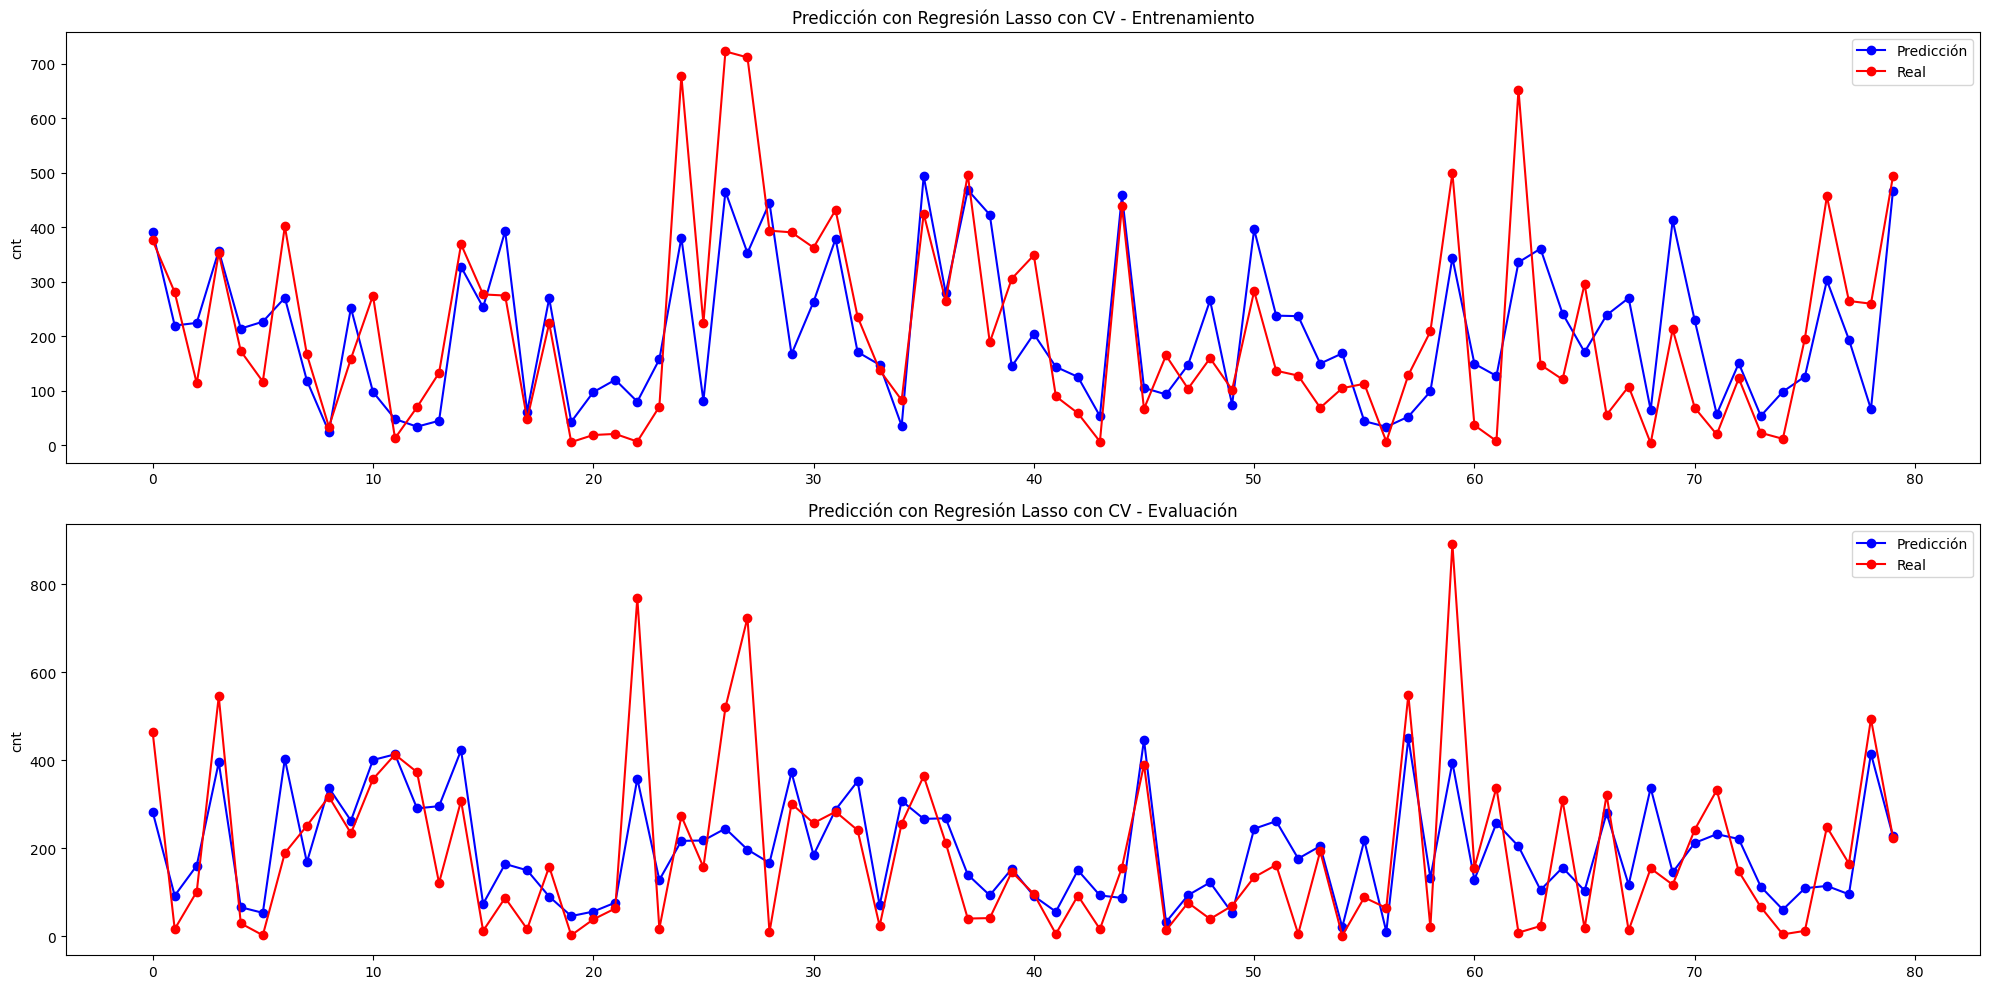

In [18]:
%matplotlib inline
fig, axs = plt.subplots(2,figsize=(20,10))
a = 1000
b= 1080

xvals = list(range(b-a))
axs[0].plot(xvals, y_pred_train[a:b],'bo-', label='Predicción')
axs[0].plot(xvals, y_train[a:b],'ro-', label='Real')

axs[1].plot(xvals, y_pred_test[a:b],'bo-', label='Predicción')
axs[1].plot(xvals, y_test[a:b],'ro-', label='Real')

axs[0].set(title='Predicción con Regresión Lasso con CV - Entrenamiento', ylabel=y_train.name)
axs[0].legend()

axs[1].set(title='Predicción con Regresión Lasso con CV - Evaluación', ylabel=y_train.name)
axs[1].legend()

plt.tight_layout()
plt.show()

In [20]:
lasso_model = best_model['regression']
trans_df = best_model['transform'].transform(x_test)
fake_df = best_model['polinomial'].transform(trans_df)

cat_names = best_model['transform'].transformers_[1][1].get_feature_names_out()
num_names = best_model['transform'].transformers_[0][2]#.feature_names_in_
col_names = list(num_names) + list(cat_names)

print(f'Intercepto: {lasso_model.intercept_}')
coef = list(zip(['Intercepto'] + list(col_names), [lasso_model.intercept_] + list(lasso_model.coef_)))
coef = pd.DataFrame(coef,columns=['Variable','Parámetro'])
coef

Intercepto: 234.1491538140997


Variable   Parámetro
0   Intercepto  234.149154
1       season    0.000000
2   weathersit    1.285813
3  time_of_day   -0.000000
4      weekday    0.000000
5         temp   -0.000000
6        atemp    0.000000
7          hum    0.000000
8    windspeed   -0.000000

**Pregunta:**
*¿Cuál es el grado de la transformación polinomial que fue seleccionado utilizando la técnica de validación?*

**Respuesta:** El grado de transformación polinómica seleccionada mediante la técnica de validación es 3.

Tanto el modelo no regularizado (polinomio puro) como el regularizado (Lasso) identificaron {'polinomial__grado': 3} como el parámetro óptimo. Esto indica que un polinomio cúbico se ajusta mejor a los datos, equilibrando la complejidad y la precisión durante el proceso de validación. Las técnicas de validación (como la validación cruzada) evalúan el rendimiento del modelo en datos invisibles dentro del conjunto de entrenamiento para evitar el sobreajuste.

**Pregunta:**
*¿Cuál fue el valor de α que fue seleccionado utilizando la técnica de validación para la regresión Lasso?*

**Respuesta:** El valor de α (alfa) seleccionado para la regresión Lasso mediante la técnica de validación es 1.

Los mejores parámetros para el algoritmo regularizado Lasso son {'polinomial__degree': 3, 'regression__alpha': 1}. Alfa controla la fuerza de la regularización L1. Un alfa más bajo (como 1) significa menos regularización, mientras que valores más altos aumentan la penalización en los coeficientes. El proceso de validación determinó que α = 1 proporcionó el mejor equilibrio entre la complejidad del modelo y el rendimiento para este conjunto de datos.

Seguramente debido a la simplicidad del modelo los valores de alpha fueron muy altos ya que simplificó aún más el modelo y no le permitió aprender características clave del conjunto de datos, de hecho se observó en la evaluación de los coeficientes como estos valores solamente tuvieron en cuenta la sensación térmica como variable objetivo.

**Pregunta:**
*A partir de la tabla comparativa, ¿cuál modelo ofrece el mejor rendimiento sobre el conjunto test? ¿Qué interpretación puedes darles a los valores obtenidos sobre las métricas de rendimiento?*

**Repuesta:** El modelo de regresión polinómica no regularizada ofrece el mejor rendimiento en el conjunto de prueba.

El modelo no regularizado tiene un RMSE más bajo (129.27) en comparación con el modelo Lasso (sqrt(17140.90) = ~130.92). RMSE mide la magnitud promedio de los errores; los valores más bajos son mejores.

* RMSE: El RMSE de aproximadamente 129.27 (no regularizado) significa que, en promedio, las predicciones del modelo están a unas 129.27 unidades de los valores reales.
* Puntuación R2: Una puntuación R2 de 0.48439 (no regularizado) sugiere que el modelo explica aproximadamente el 48.44% de la varianza en la variable objetivo. Esto indica un ajuste moderado.
* Puntuación R2 Ajustada: La puntuación R2 ajustada tiene en cuenta el número de predictores en el modelo, penalizando la inclusión de variables innecesarias. La similitud entre la puntuación R2 y la puntuación R2 ajustada sugiere que la complejidad del modelo es apropiada.

El modelo lasso desempeño peor que el modelo no regularizado. Esto significa que en este caso particular, los datos no estaban lo suficientemente sobreajustados para necesitar la regularización lasso. Tambien, la regularización lasso reduce los coeficientes de las variables menos importantes a cero, y en este caso, las variables que el modelo uso, eran necesarias.

Se aconseja reducir los valores de regularización para aumentar la precisión y con esto mejorar la precisión.

**Pregunta:**
*¿Cuáles variables fueron seleccionadas con el modelo Lasso? A partir de estas, ¿qué interpretación de cara al problema puedes dar? Reflexiona sobre cómo este nuevo conocimiento podría ayudar a tomar decisiones en el contexto del problema.*

**Respuesta:**Como se puede observar en los parámetros del modelo regularizado, Lasso ha reducido a cero los coeficientes de las siguientes variables: 'season', 'time_of_day', 'weekday', 'temp', 'atemp', 'hum' y 'windspeed'.  Las únicas variables que permanecen con coeficientes distintos de cero son 'Intercepto' y 'weathersit'

Esto significa que, según el modelo Lasso, la variable 'weathersit' (condición climática) es la única predictora significativa del número de bicicletas compartidas. Las demás variables, como la temperatura, la humedad, la velocidad del viento, el día de la semana, la estación del año y la hora del día, no tienen un impacto significativo en la predicción del modelo Lasso.

Es importante recordar que esto no significa necesariamente que estas variables no tengan ninguna relación con el número de bicicletas compartidas en la realidad. Simplemente significa que, en el contexto de este modelo y con la regularización aplicada, su influencia no es lo suficientemente fuerte como para ser considerada relevante.

###Toma de decisiones:

Dado que el modelo Lasso ha identificado que 'weathersit' es la variable más importante, se podría construir un modelo más simple que solo utilice esta variable. Esto podría facilitar la interpretación del modelo y reducir el costo computacional.

Los resultados sugieren que la condición climática es un factor crucial a la hora de predecir la demanda de bicicletas compartidas. Por lo tanto, se deberían concentrar los esfuerzos en recopilar datos precisos y detallados sobre las condiciones climáticas.

Se podrían diseñar campañas de marketing y estrategias operativas específicas en función de la condición climática. Por ejemplo, ofrecer descuentos en días con mal tiempo para incentivar el uso de las bicicletas.

Si se sabe que la condición climática es el principal factor que influye en la demanda, se pueden ajustar los recursos (como el número de bicicletas disponibles) en consecuencia. Por ejemplo, aumentar la disponibilidad de bicicletas en días con buen tiempo y reducirla en días con mal tiempo.

Reflexión:
Es interesante observar que el modelo Lasso ha seleccionado una única variable como predictora principal. Esto puede deberse a que la variable 'weathersit' captura información relevante que está correlacionada con otras variables. Por ejemplo, la condición climática puede estar relacionada con la temperatura, la humedad y la velocidad del viento. Al incluir 'weathersit' en el modelo, es posible que las demás variables se vuelvan redundantes.